First import some packages:

In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt

Now let's look at a spectrum! The HARPS pipeline delivers extracted spectra in two forms. 

First is a 1D extracted spectrum. This spectrum has been rebinned to a uniform wavelength grid, and all echelle orders have been merged. It's also in the barycentric rest frame. The filename for a 1D extracted HARPS spectrum includes the code "s1d".

Run the following code to read in a 1D spectrum file and plot a section:

(6500, 6600)

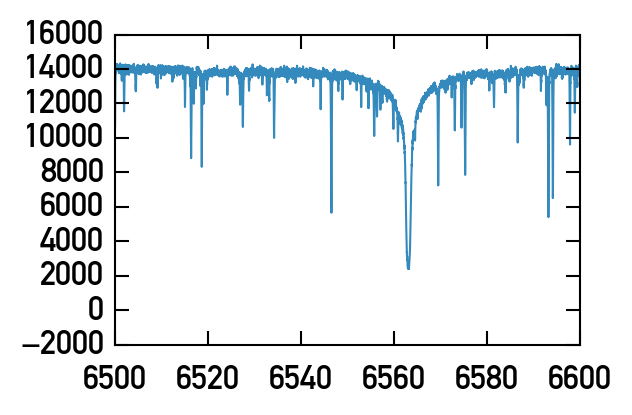

In [2]:
s1d_file = 'data/HARPS.2012-04-26T08:03:57.240_s1d_A.fits'
s1d_wave, s1d_spec = wobble.read_harps.read_spec(s1d_file)
plt.plot(s1d_wave,s1d_spec)
plt.xlim(6500,6600)

Nice H-alpha line! Notice that the continuum of the spectrum is at about 14,000. The spectrum has been partially corrected for the instrumental response by the pipeline, but it still has an odd continuum shape due to the varying sensitivity of the CCD detector at different wavelengths:

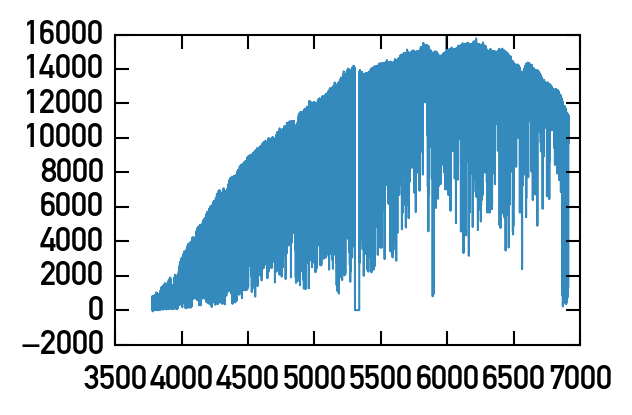

In [3]:
plt.plot(s1d_wave,s1d_spec)

So the 1D spectrum needs to be continuum normalized.

The second form of spectrum delivered by the HARPS pipeline is a "2D" extracted spectrum, where each echelle order has been extracted and is given separately. This file has a shape 72 (echelle orders) by 2048 (pixels per order), and its filename includes the code "e2ds". Unlike the 1D file, it is in the observatory rest frame, not the barycentric rest frame.

Run the following code to read a 2D spectrum:

(6500, 6600)

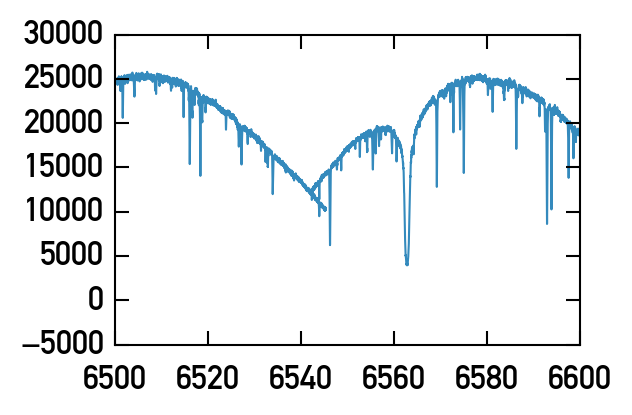

In [4]:
e2ds_file = 'data/HARPS.2012-04-26T08:03:57.240_e2ds_A.fits'
e2ds_wave, e2ds_spec = wobble.read_harps.read_spec_2d(e2ds_file)
plt.plot(e2ds_wave.flatten(),e2ds_spec.flatten())
plt.xlim(6500,6600)

Unlike the 1D case, we can clearly see a curvature in each echelle order. This is the blaze function. A blaze model is provided by the pipeline. Try applying the blaze correction like this:

(6500, 6600)

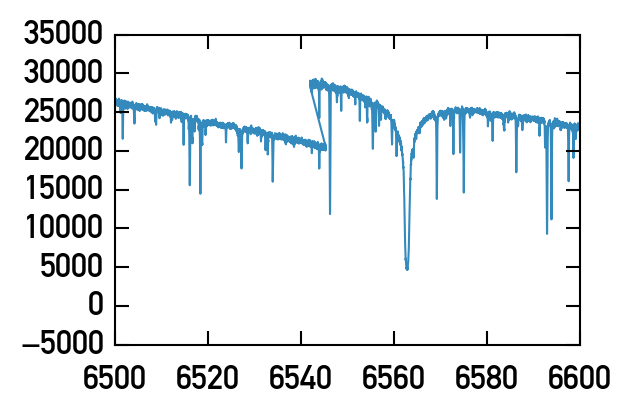

In [6]:
e2ds_wave_b, e2ds_spec_b = wobble.read_harps.read_spec_2d(e2ds_file, blaze=True)
plt.plot(e2ds_wave_b.flatten(),e2ds_spec_b.flatten())
plt.xlim(6500,6600)

After blaze correction, the orders are a lot more flat, but there's still a linear slope and a disconnect between each order. Viewing the entire spectrum, you can see both the linear slopes and the overall CCD response:

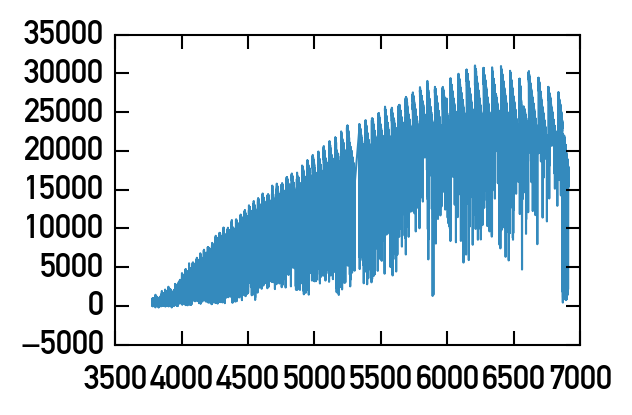

In [7]:
plt.plot(e2ds_wave_b.flatten(),e2ds_spec_b.flatten())

The pipeline provides a flat-field also. However, dividing by the flat does very little:

(6500, 6600)

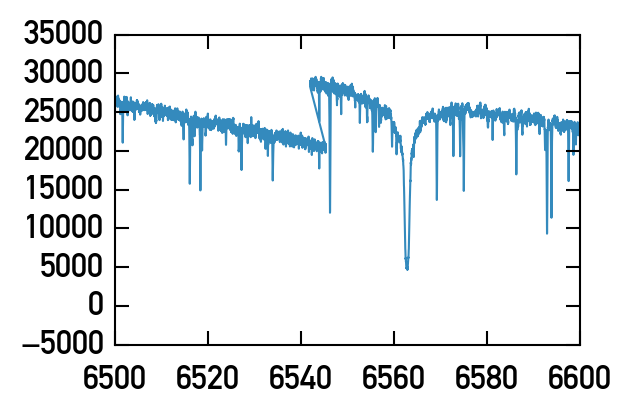

In [9]:
e2ds_wave_bf, e2ds_spec_bf = wobble.read_harps.read_spec_2d(e2ds_file, blaze=True, flat=True)
plt.plot(e2ds_wave_bf.flatten(),e2ds_spec_bf.flatten())
plt.xlim(6500,6600)

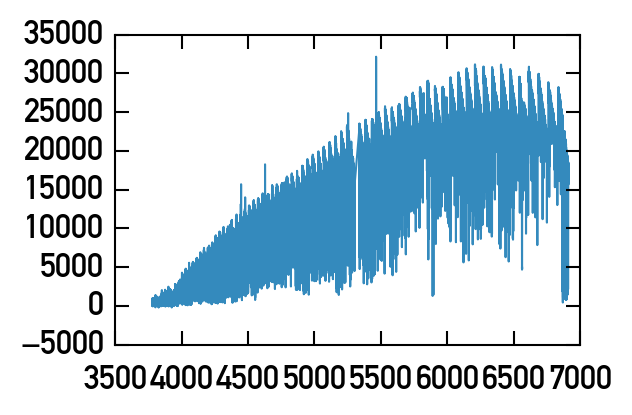

In [10]:
plt.plot(e2ds_wave_bf.flatten(),e2ds_spec_bf.flatten())